In [1]:
import numpy as np
import itertools
import random
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

N = 200    #Training data set
n = 10    #subset (mini batch gradient descent)
X = 3    #number of features   
alpha = 2.5 * 10**(-6)    #learning rate
count = 0


#this function is used to generate the names for all batches
def BatchListNameGenerator(number):    
    b_List = []
    for i in range (number):
        b_Name = 'B'+str(i+1) 
        b_List.append(b_Name)
    
    return b_List


#this function is used to generate the names for all responses for that specific batch
def OutputListGenerator(number):    
    o_List = []
    for i in range (number):
        o_Name = 'y' + str(i+1)
        o_List.append(o_Name)
    
    return o_List


#this function is used to generate rando values of regression parameter
def BeetaGenerator(l_Limit,u_Limit):   
    B_List = []
    while len(B_List) < 4:
        random_value = random.uniform(l_Limit,u_Limit)
        
        if random_value not in B_List:
            B_List.append(random_value)
            
    return B_List
        
    
#to load the matrix and response from the csv file
matrix = np.loadtxt("Advertising_N200_p3.csv",skiprows=1,usecols=[0,1,2],delimiter=',') 
y_Matrix = np.loadtxt("Advertising_N200_p3.csv",skiprows=1,usecols=[3],delimiter=',') 

y_Matrix = np.array(y_Matrix)
#to add 1 to the begining of each row
design_Matrix = np.insert(matrix, 0, 1, axis=1)
 
#functions to generate names for batches and responses
Batch_Names = BatchListNameGenerator(int(N/n))
Output_Names = OutputListGenerator(int(N/n))

#to generate random value of beeta from the specifed range
beeta = BeetaGenerator(-1,1)
beeta.sort()
beeta = np.array(beeta)
beeta_list = []

cost_functionlist = []

#this is the main part of the code that generates beeta vlaue after 20k iterations
while count<=20000:
    count=count+1
    if count==20000+1:
        break
        
    #random indices generator and shuffler
    indices = list(itertools.chain(range(0,N)))
    random.shuffle(indices)
    
    
    #this part will create the mini batches based on random indices
    for i in range (int(N/n)):
        Batch_Names[i]= []
        Output_Names[i] = []
        for j in range (n):
            Batch_Names[i].append(design_Matrix[indices[j]])
            Output_Names[i].append(y_Matrix[indices[j]])


        Batch_Names[i]=np.array(Batch_Names[i],dtype=float)
        Output_Names[i]=np.array(Output_Names[i],dtype=float)

        del indices[:n]

        #to calculate the beta regression parameter
        beeta = np.dot(np.multiply(2*alpha, np.array(Batch_Names[i]).transpose()),Output_Names[i] - np.dot(Batch_Names[i],beeta)) + beeta
        
    cost_function = np.dot((y_Matrix - np.dot(design_Matrix,beeta)).transpose(),(y_Matrix - np.dot(design_Matrix,beeta)))
    cost_functionlist.append(cost_function)
        
    beeta_list.append(beeta)


cost_functionlist = np.array(cost_functionlist)
beeta_list= np.array(beeta_list)
print("DELIVERABLE 3:")
print(beeta_list)






DELIVERABLE 3:
[[ 0.43081442 -0.0172868   0.33345196  0.29743022]
 [ 0.42939639  0.01187446  0.25307065  0.15025167]
 [ 0.4291476   0.04439075  0.22416196  0.08352924]
 ...
 [ 2.7948597   0.04368409  0.18868889 -0.00084304]
 [ 2.79495073  0.05078283  0.19049772  0.00357244]
 [ 2.79495055  0.04296925  0.18911304  0.00053722]]


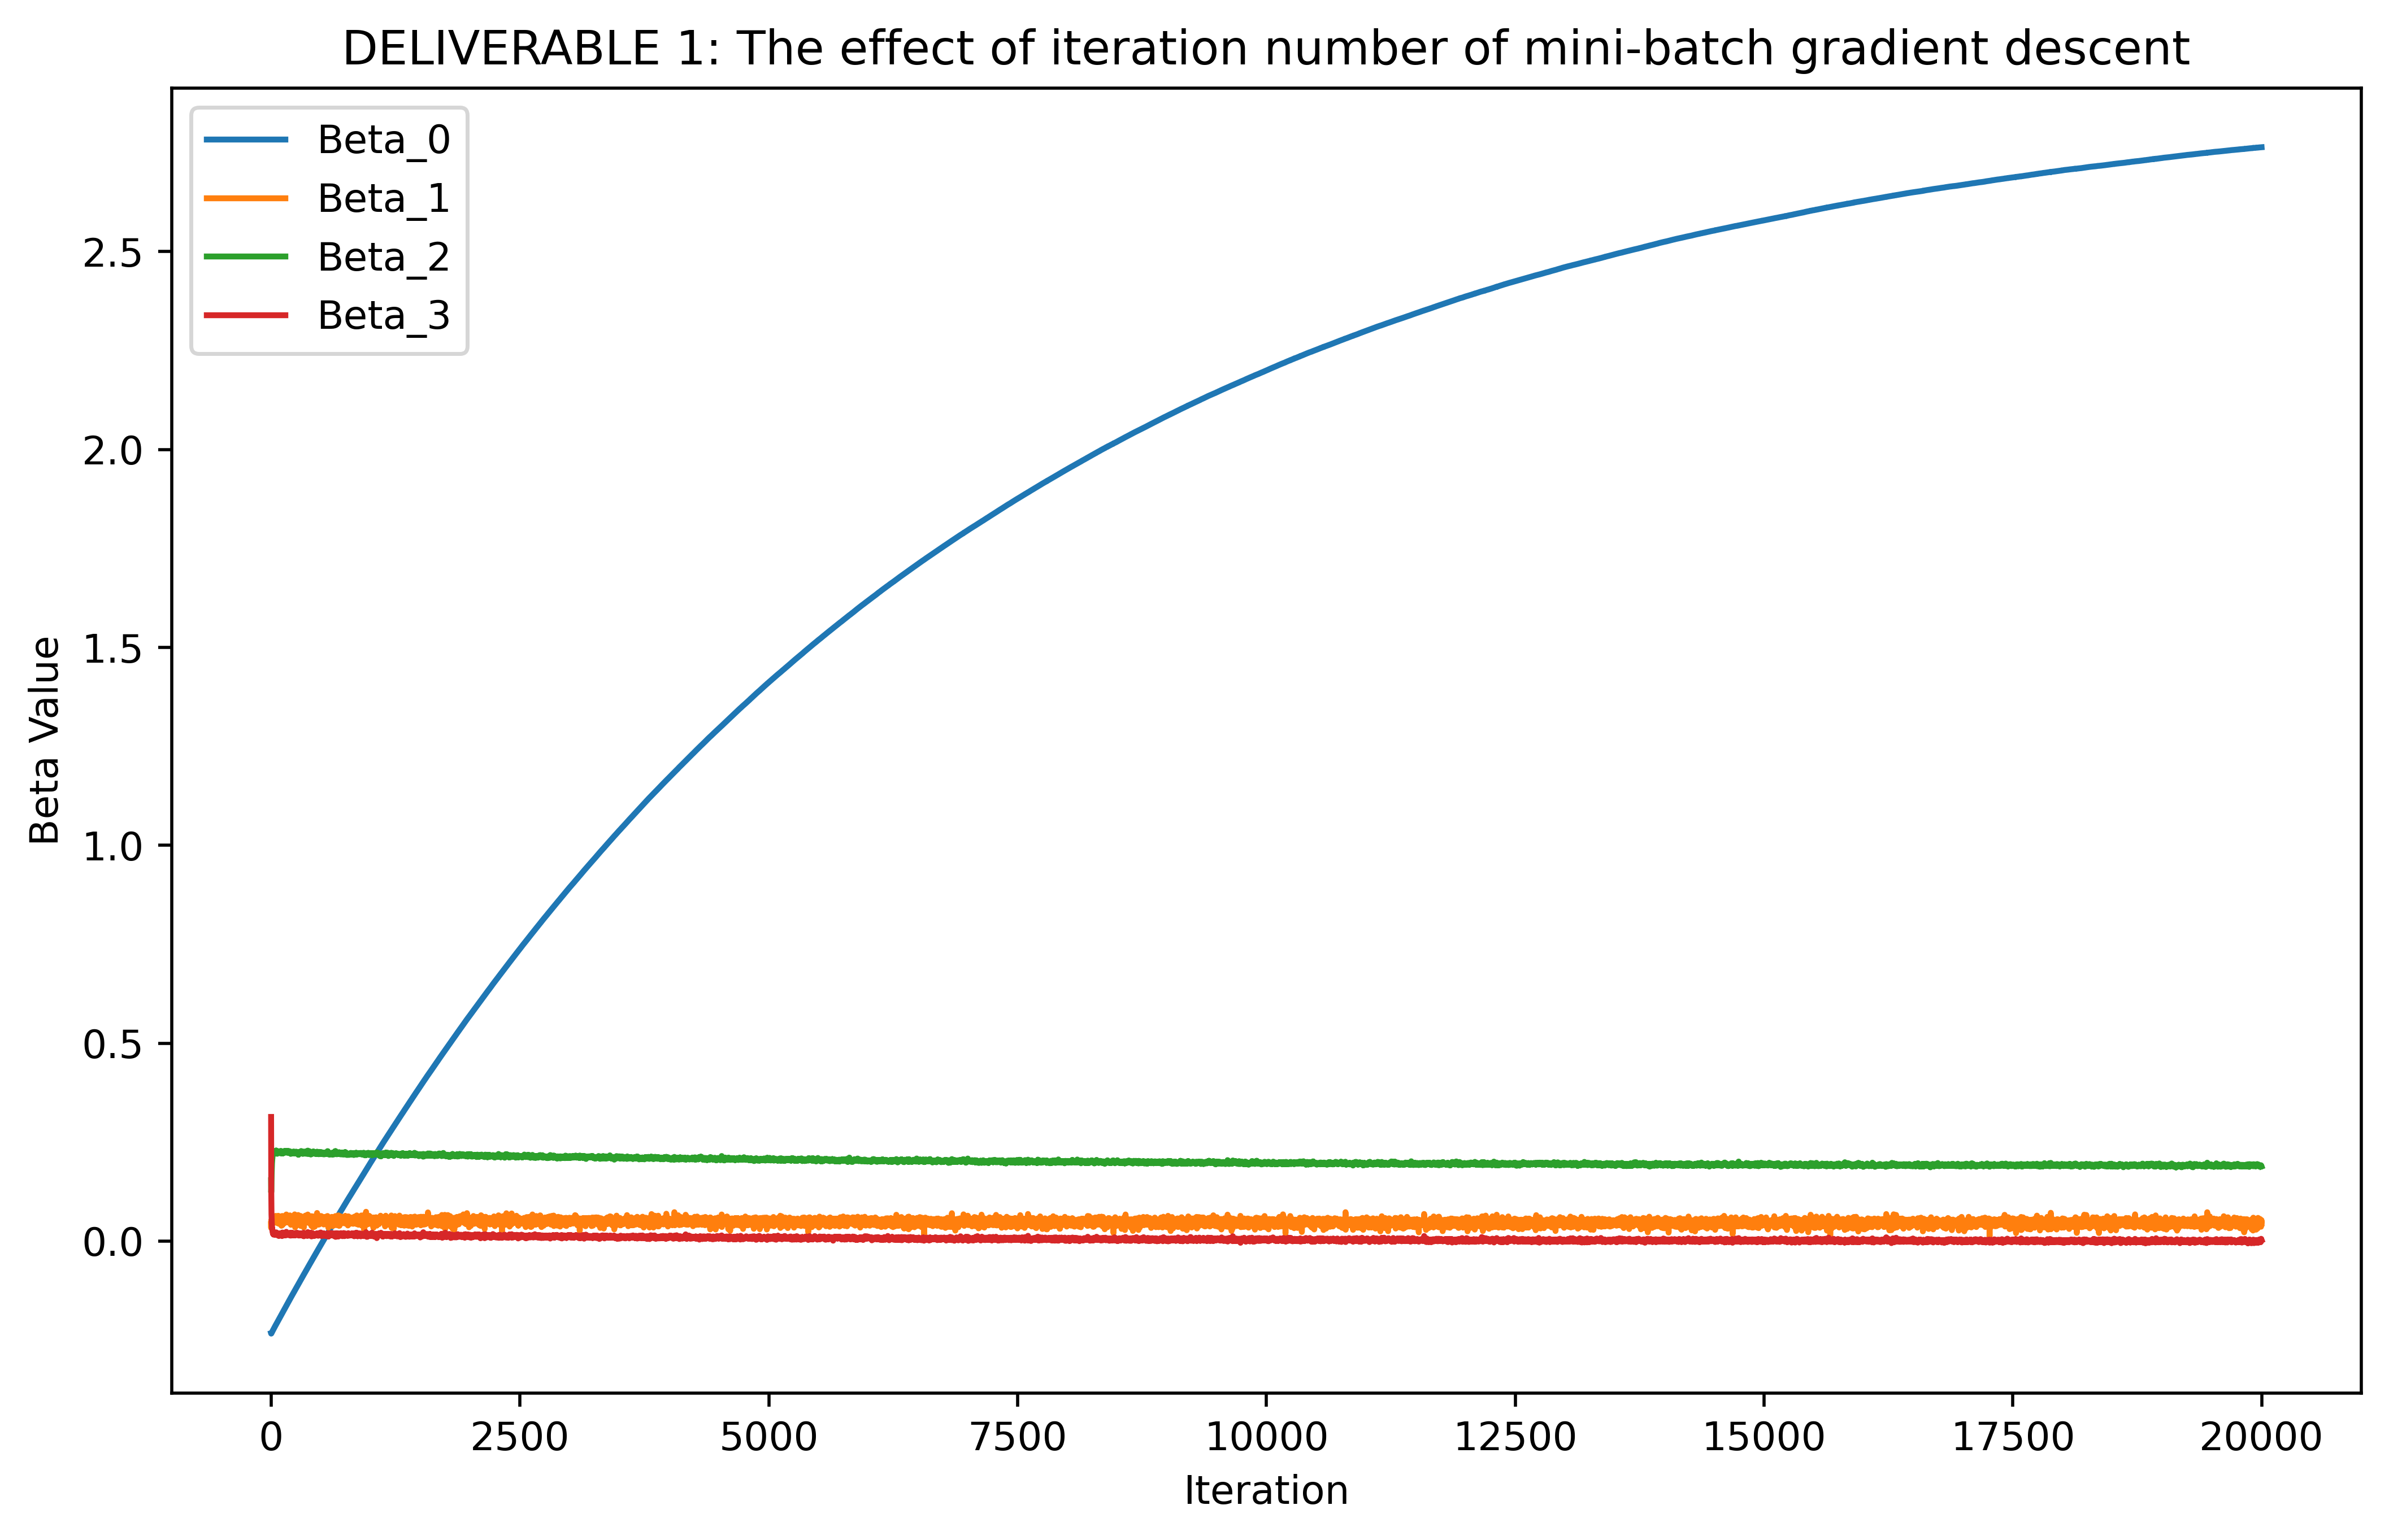

In [93]:
iterations = np.arange(0, 20000, 1)  # Placeholder for iteration numbers
beta_0 = beeta_list[:,0]  # Placeholder for beta_0 values
beta_1 = beeta_list[:,1]  # Placeholder for beta_1 values
beta_2 = beeta_list[:,2]  # Placeholder for beta_2 values
beta_3 = beeta_list[:,3]  # Placeholder for beta_3 values

plt.figure(figsize=(10,6),dpi=500)
# Create the plot
plt.plot(iterations, beta_0, label='Beta_0')
plt.plot(iterations, beta_1, label='Beta_1')
plt.plot(iterations, beta_2, label='Beta_2')
plt.plot(iterations, beta_3, label='Beta_3')

# Labeling axes and adding legend
plt.xlabel('Iteration')
plt.ylabel('Beta Value')
plt.title('DELIVERABLE 1: The effect of iteration number of mini-batch gradient descent')
plt.legend()

# Show the plot
plt.show()

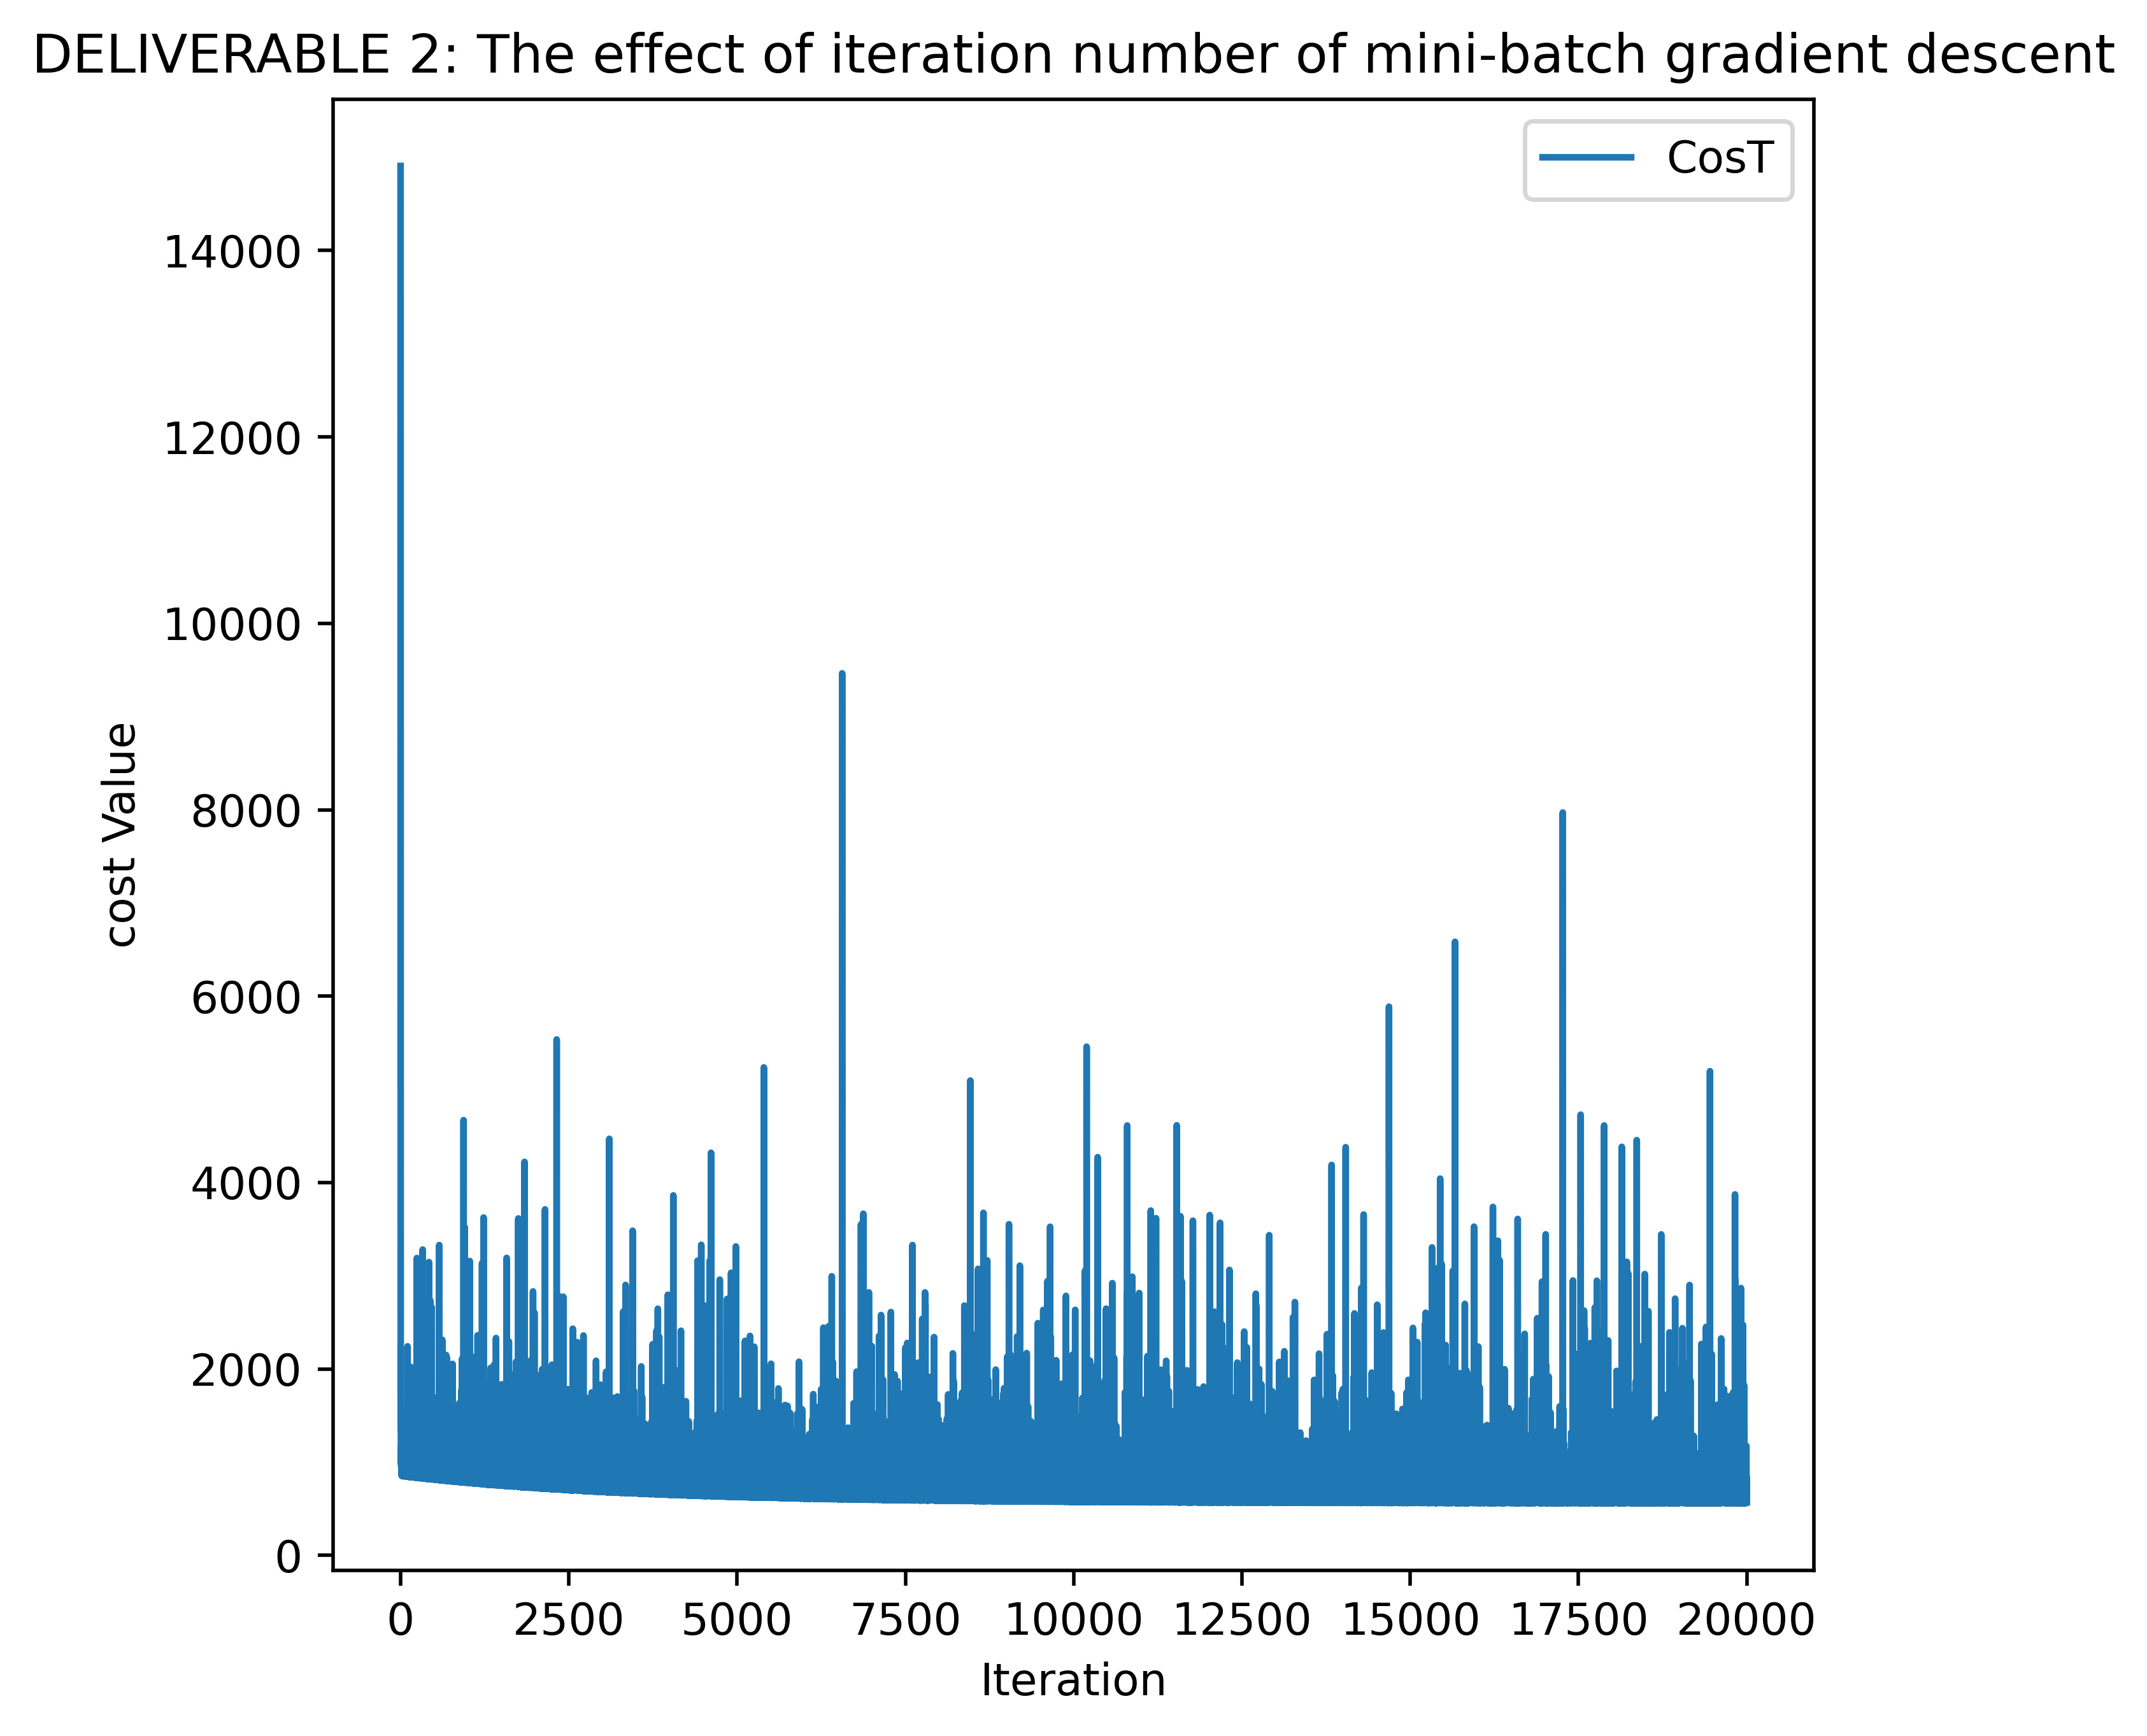

In [94]:
# Assuming you have data for beta coefficients over iterations
iterations = np.arange(0, 20000, 1)  # Placeholder for iteration numbers
costfunctionLine = cost_functionlist  # Placeholder for beta_0 values




plt.figure(figsize=(6,6),dpi=500)
# Create the plot
plt.plot(iterations, costfunctionLine, label='CosT')


# Labeling axes and adding legend
plt.xlabel('Iteration')
plt.ylabel('cost Value')
plt.title('DELIVERABLE 2: The effect of iteration number of mini-batch gradient descent')
plt.legend()

# Show the plot
plt.show()

In [95]:
modelResponse = []

for i in range (N):
    mainResponse = beeta[0]+ beeta[1]*design_Matrix[i][1] + beeta[2]*design_Matrix[i][2] + beeta[3]*design_Matrix[i][3]
    modelResponse.append(mainResponse)

y_Matrix = np.array(y_Matrix)
modelResponse = np.array(modelResponse)

MSE = np.multiply(1/N,np.dot((y_Matrix-modelResponse).transpose(),(y_Matrix-modelResponse)))
print("DELIVERABLE 4")
print("MSE is ",MSE)


DELIVERABLE 4
MSE is  2.8349904367558727
